In [486]:
import pandas as pd
import numpy as np
import textrank
import sklearn
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [487]:
import pickle

In [206]:
col_labels = ['Date','AppID','AppName','Lang','1', '2', '3', 'Author','Stars','Title','Review','Reply','Device','DeviceType','Tags','Updated']

In [207]:
df = pd.read_csv('reviews_googleplay_1507788606.csv', 
                  skiprows=4, engine='python', names = col_labels, index_col=False,
                  error_bad_lines=True
                 )

In [208]:
df.head(3)

,Date,AppID,AppName,Lang,1,2,3,Author,Stars,Title,Review,Reply,Device,DeviceType,Tags,Updated
0,\t2017-10-11,com.wachanga.babycare,Baby Breastfeeding Tracker. Newborn Diary,pt,NaN,NaN,NaN,Renato Morais,5,NaN,Muito bom,NaN,NaN,NaN,NaN,NaN
1,\t2017-10-11,com.wachanga.babycare,Baby Breastfeeding Tracker. Newborn Diary,de,NaN,NaN,NaN,NaN,4,NaN,Scheint eine gute App zu sein. Sehr übersichtl...,NaN,NaN,NaN,NaN,NaN
2,\t2017-10-11,com.wachanga.babycare,Baby Breastfeeding Tracker. Newborn Diary,pt,NaN,NaN,NaN,NaN,5,NaN,Perfeito. Consigo controlar todos os dados imp...,NaN,NaN,NaN,NaN,NaN


In [209]:
df_1 = df.drop(['AppID','AppName', '1', '2', '3', 'Device','DeviceType','Tags','Updated'], axis =1)

#col_labels = ['Date',,'Lang', 'Author','Stars','Title','Review','Reply',]

In [210]:
df_1.head(3)

,Date,Lang,Author,Stars,Title,Review,Reply
0,\t2017-10-11,pt,Renato Morais,5,NaN,Muito bom,NaN
1,\t2017-10-11,de,NaN,4,NaN,Scheint eine gute App zu sein. Sehr übersichtl...,NaN
2,\t2017-10-11,pt,NaN,5,NaN,Perfeito. Consigo controlar todos os dados imp...,NaN


In [212]:
df_1.shape

(3510, 7)

In [213]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510 entries, 0 to 3509
Data columns (total 7 columns):
Date      3510 non-null object
Lang      3510 non-null object
Author    2949 non-null object
Stars     3510 non-null int64
Title     197 non-null object
Review    3510 non-null object
Reply     533 non-null object
dtypes: int64(1), object(6)
memory usage: 192.0+ KB


In [ ]:
#plt.plot(x)

In [214]:
x = df_1.groupby('Lang').Review.count().sort_values(ascending = False)
#sns.distplot(x)

In [215]:
x_Lang = pd.DataFrame(x)

In [216]:
x_Lang.style.bar()

,Review
Lang,
ru,1081
pt,716
es,361
en,356
de,349
fr,122
ko,116
pl,88
it,79


In [ ]:
#chipo_drink_steak_bowl = chipo[(chipo.item_name == "Canned Soda") & (chipo.quantity > 1)]


In [217]:
Ru_review = df_1[(df_1.Lang == 'ru')]
Ru_review.shape

(1081, 7)

In [218]:
df.Review[2]

'Perfeito. Consigo controlar todos os dados importantes do meu filho!'

In [ ]:
## trnsl.1.1.20171012T153315Z.27f7b7ad41361c04.5bb573e2c4533a4aeafa7deeba56e203de72b930

In [219]:
from yandex_translate import YandexTranslate
translate = YandexTranslate('trnsl.1.1.20171012T153315Z.27f7b7ad41361c04.5bb573e2c4533a4aeafa7deeba56e203de72b930')
print('Languages:', translate.langs)
print('Translate directions:', translate.directions)
print('Detect language:', translate.detect('Привет, мир!'))
print('Translate:', translate.translate('Привет, мир!', 'ru-en'))  # or just 'en'

Languages: {'bg', 'et', 'fi', 'ru', 'ca', 'hy', 'it', 'lv', 'be', 'az', 'sv', 'uk', 'el', 'sr', 'tr', 'lt', 'hr', 'hu', 'sq', 'es', 'da', 'en', 'mk', 'no', 'sk', 'nl', 'de', 'pt', 'sl', 'cs', 'pl', 'fr', 'ro'}
Translate directions: ['az-ru', 'be-bg', 'be-cs', 'be-de', 'be-en', 'be-es', 'be-fr', 'be-it', 'be-pl', 'be-ro', 'be-ru', 'be-sr', 'be-tr', 'bg-be', 'bg-ru', 'bg-uk', 'ca-en', 'ca-ru', 'cs-be', 'cs-en', 'cs-ru', 'cs-uk', 'da-en', 'da-ru', 'de-be', 'de-en', 'de-es', 'de-fr', 'de-it', 'de-ru', 'de-tr', 'de-uk', 'el-en', 'el-ru', 'en-be', 'en-ca', 'en-cs', 'en-da', 'en-de', 'en-el', 'en-es', 'en-et', 'en-fi', 'en-fr', 'en-hu', 'en-it', 'en-lt', 'en-lv', 'en-mk', 'en-nl', 'en-no', 'en-pt', 'en-ru', 'en-sk', 'en-sl', 'en-sq', 'en-sv', 'en-tr', 'en-uk', 'es-be', 'es-de', 'es-en', 'es-ru', 'es-uk', 'et-en', 'et-ru', 'fi-en', 'fi-ru', 'fr-be', 'fr-de', 'fr-en', 'fr-ru', 'fr-uk', 'hr-ru', 'hu-en', 'hu-ru', 'hy-ru', 'it-be', 'it-de', 'it-en', 'it-ru', 'it-uk', 'lt-en', 'lt-ru', 'lv-en', 'l

In [220]:
text = df.Review[2]
text

'Perfeito. Consigo controlar todos os dados importantes do meu filho!'

## Переведем 10 отзывов для проверки словаря с топ 4-х языков 

### Русский 

In [488]:
m = []
for i in russian_df_total.index:
    m.append(i)
print (len(m))

1081


In [444]:
q_russian={}
for i, elem in enumerate(russ_total):
    q_russian[m[i]] = elem

## Pickle !!!
https://docs.python.org/3/library/pickle.html#examples

In [445]:
with open('q_russian.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(q_russian, f, pickle.HIGHEST_PROTOCOL)

In [307]:
''' with open('q_russian.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    russian_data = pickle.load(f)
'''

In [ ]:
# создадим dataframe где будет оригинальный отзыв и его перевод с яндекса 

In [419]:
russian_df_total = df_1[df_1['Lang'] == 'ru']
len (russian_df_total)

1081

In [424]:
russian_df_1 = df_1[df_1['Lang'] == 'ru']['Review'][0:51]
russian_df_2 = df_1[df_1['Lang'] == 'ru']['Review'][51:101]
russian_df_3 = df_1[df_1['Lang'] == 'ru']['Review'][101:151]
russian_df_4 = df_1[df_1['Lang'] == 'ru']['Review'][151:201]
russian_df_5 = df_1[df_1['Lang'] == 'ru']['Review'][201:251]
russian_df_6 = df_1[df_1['Lang'] == 'ru']['Review'][251:301]
russian_df_7 = df_1[df_1['Lang'] == 'ru']['Review'][301:351]
russian_df_8 = df_1[df_1['Lang'] == 'ru']['Review'][351:401]
russian_df_9 = df_1[df_1['Lang'] == 'ru']['Review'][401:451]
russian_df_10 = df_1[df_1['Lang'] == 'ru']['Review'][451:501]
russian_df_11 = df_1[df_1['Lang'] == 'ru']['Review'][501:551]
russian_df_12 = df_1[df_1['Lang'] == 'ru']['Review'][551:601]
russian_df_13 = df_1[df_1['Lang'] == 'ru']['Review'][601:651]
russian_df_14 = df_1[df_1['Lang'] == 'ru']['Review'][651:701]
russian_df_15 = df_1[df_1['Lang'] == 'ru']['Review'][701:751]
russian_df_16 = df_1[df_1['Lang'] == 'ru']['Review'][751:801]
russian_df_17 = df_1[df_1['Lang'] == 'ru']['Review'][801:851]
russian_df_18 = df_1[df_1['Lang'] == 'ru']['Review'][851:901]
russian_df_19 = df_1[df_1['Lang'] == 'ru']['Review'][901:951]
russian_df_20 = df_1[df_1['Lang'] == 'ru']['Review'][951:1001]
russian_df_21 = df_1[df_1['Lang'] == 'ru']['Review'][1001:1051]
russian_df_22 = df_1[df_1['Lang'] == 'ru']['Review'][1051:]

In [425]:
russ_1 = translate.translate(russian_df_1, 'ru-en')['text']

In [360]:
russ_2 = translate.translate(russian_df_2, 'ru-en')['text']

In [361]:
russ_3 = translate.translate(russian_df_3, 'ru-en')['text']

In [362]:
russ_4 = translate.translate(russian_df_4, 'ru-en')['text']

In [363]:
russ_5 = translate.translate(russian_df_5, 'ru-en')['text']

In [364]:
russ_6 = translate.translate(russian_df_6, 'ru-en')['text']

In [365]:
russ_7 = translate.translate(russian_df_7, 'ru-en')['text']

In [366]:
russ_8 = translate.translate(russian_df_8, 'ru-en')['text']

In [367]:
russ_9 = translate.translate(russian_df_9, 'ru-en')['text']

In [368]:
russ_10 = translate.translate(russian_df_10, 'ru-en')['text']

In [369]:
russ_11 = translate.translate(russian_df_11, 'ru-en')['text']

In [370]:
russ_12 = translate.translate(russian_df_12, 'ru-en')['text']

In [371]:
russ_13 = translate.translate(russian_df_13, 'ru-en')['text']

In [372]:
russ_14 = translate.translate(russian_df_14, 'ru-en')['text']

In [373]:
russ_15 = translate.translate(russian_df_15, 'ru-en')['text']

In [374]:
russ_16 = translate.translate(russian_df_16, 'ru-en')['text']

In [375]:
russ_17 = translate.translate(russian_df_17, 'ru-en')['text']

In [376]:
russ_18 = translate.translate(russian_df_18, 'ru-en')['text']

In [377]:
russ_19 = translate.translate(russian_df_19, 'ru-en')['text']

In [378]:
russ_20 = translate.translate(russian_df_20, 'ru-en')['text']

In [379]:
russ_21 = translate.translate(russian_df_21, 'ru-en')['text']

In [380]:
russ_22 = translate.translate(russian_df_22, 'ru-en')['text']

In [491]:
russ_total_lists = russ_1 + russ_2 + russ_3 + russ_4 + russ_5\
                + russ_6 + russ_7 + russ_8 + russ_9 + russ_10\
                + russ_11 + russ_12 + russ_13 + russ_14 + russ_15\
                + russ_16+ russ_17 +russ_18 +russ_19+ russ_20 +russ_21 + russ_22

In [492]:
with open('russ_total_lists.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(russ_total_lists, f, pickle.HIGHEST_PROTOCOL)

In [493]:
len (russ_total_lists)

1081

In [533]:
#russian_se = pd.Series(russian['text']) 

In [489]:
#str_total_text_ru = ''.join(russ_total)

In [ ]:
'''
сохранить текст в список 

tokenizer=lambda x: x
pickle

https://docs.python.org/3/library/pickle.html#examples
https://docs.python.org/3/library/pickle.html

1 весь текст - text rank в каждом отзыве 
2 подаем векторизатору на вход список списков - где первый элемент список ключевых слов 1-го отзыва
3 запускаем кластеризации 
4 получаем кластеры с группой отзывов - смотрим их интерпретацию 


2 векторизиируем каждый текст - строки отзывы, колонки - ключевые слова из text rank 
Vectorizer 
fit tranform (есть подсчет слов) - подать список ключевых слов, в качестве токенизации указать функцию, 
которая берет на вход 
tokenizer - должен взять список и отдать список (вместо взять сплошной текст и отдать список слов)

составляем список из ключевых слов


'''

In [528]:
# надо в цикле вытаскивать для каждого отзыва по отдельности и складывать в общий список 

key_phrases = []
for i in russ_total_lists:
    t = ''.join(i).lower()
    key_phrases.append(list(textrank.extract_key_phrases(t)))
print (len(key_phrases ))

1081


In [613]:
# Сохраняем данные на диске в формате python списка 

In [532]:
with open('key_phrases.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(key_phrases, f, pickle.HIGHEST_PROTOCOL)

In [521]:
key_phrases[10]

['example', 'allotted', 'opportunity']

##  Векторизация 

In [529]:
import sklearn.feature_extraction.text
vctr = sklearn.feature_extraction.text.CountVectorizer(tokenizer = lambda key_phrases: key_phrases)

# tokenizer = lambda key_phrases: key_phrases - должен взять список и отдать список 
#(вместо взять сплошной текст и отдать список слов)

In [552]:
len(key_phrases)

1081

In [549]:
list(' '.join(i) for i in key_phrases[:5])

['everything harmonious much thank',
 'application example information attention sleep',
 'beginning completion dream walk',
 'simple',
 'super']

In [550]:
X_train = vctr.fit_transform(list(' '.join(i) for i in key_phrases)) # скармливаем весь текст ключевых слов 

In [551]:
# Почему 44 строки ???
X_train.shape

(1081, 44)

In [607]:
print (X_train) # посмотрим на матрицу 

  (0, 22)	1
  (0, 14)	1
  (0, 30)	1
  (0, 32)	2
  (0, 26)	2
  (0, 24)	2
  (0, 12)	2
  (0, 0)	3
  (0, 18)	1
  (0, 25)	3
  (0, 20)	2
  (0, 19)	4
  (0, 31)	2
  (0, 36)	1
  (0, 29)	2
  (0, 33)	1
  (0, 16)	2
  (1, 17)	1
  (1, 35)	1
  (1, 23)	3
  (1, 27)	4
  (1, 14)	1
  (1, 30)	1
  (1, 26)	4
  (1, 24)	2
  :	:
  (1078, 18)	1
  (1078, 25)	1
  (1078, 20)	1
  (1078, 19)	2
  (1078, 31)	2
  (1078, 36)	1
  (1078, 29)	3
  (1078, 33)	1
  (1078, 16)	3
  (1079, 34)	1
  (1079, 17)	1
  (1079, 23)	1
  (1079, 27)	2
  (1079, 14)	1
  (1079, 26)	1
  (1079, 12)	2
  (1079, 0)	1
  (1079, 25)	1
  (1079, 20)	3
  (1079, 31)	1
  (1079, 16)	1
  (1080, 34)	1
  (1080, 17)	1
  (1080, 20)	1
  (1080, 16)	1


## Кластеризация 

In [539]:
from sklearn.cluster import KMeans

In [608]:
# Выбираем оптимальное кол-во кластеров 

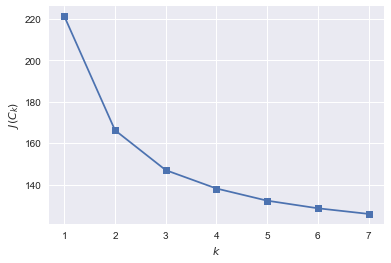

In [540]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_train)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [463]:
clf_kmeans = KMeans(n_clusters=4)

In [ ]:
# Передаем в модель все данные 

In [541]:
clusters_kmeans = clf_kmeans.fit_predict(X_train)

In [594]:
# Каждый текст это точка в пространстве признаков, а признаки - это наличие ключевого слова 
# У нас 4 кластера. Показываем к какому кластеру относится текст  

text_cluster_0 =[]
text_cluster_1 =[]
text_cluster_2 =[]
text_cluster_3 =[]
for i, elem in enumerate(clusters_kmeans):
    if elem == 0:
        text_cluster_0.append(russ_total_lists[i])
    if elem == 1:
        text_cluster_1.append(russ_total_lists[i])
    if elem == 2:
        text_cluster_2.append(russ_total_lists[i])
    if elem == 3:
        text_cluster_3.append(russ_total_lists[i])

In [612]:
text_cluster_0[0:3]

["The app correctly displays the information in the end of the day. For example, the child's sleep consists of 37 hours per day. How can this be? When the baby was sleeping 11 hours. Or walk, walking one hour, the application writes the results of 14 hours. Developers, pay attention to it.",
 'The app is user friendly, everything you need + nice visualization of graphs. But somehow it does not display correctly feeding at the time of the day. I would also like to be able to keep records in ml and breast milk is not expressed, as many mothers in certain periods there is a need to measure how much a child eats.',
 'The app is good, use regularly for 4 months. There are a couple of podobnosti for me personally... I would Like to have the opportunity to transfer data to another device. To expand the function of "remind". So for example you could remind me in 12 hours to give one drug, and in 3 hours more.']

In [601]:
text_cluster_1[0:3]

['Good app, but it incorrectly displays the statistics, in particular the mode of the day. Sleep and feeding there somehow overlap in time, though in fact no. It would be nice to have the possibility of a direct transition from statistics to action(s) click on the chart. Also lacks the short (compact) display the day\'s actions, where each action takes one line. Not enough option activity simply "vigil".',
 "Changes after the upgrade didn't like. The fact that it is not always on hand phone and therefore it is not possible to set a timer during feeding, so it happens that watch point after the fact - by default, the program feeding the left chest, choose the right and the feeding time is changed to current, it is necessary to expose anew. As for feeding both right and left breast, before you could set the total time for both, now for each separately. Again, this is useful for those who not releases the phone from his hands. I would like to return, as before the opportunity to exhibit t

In [597]:
text_cluster_2[0:2]

['Thank you so much for your work! This is the best app I have installed. 👍👍👍 Has everything you need to analyze the harmonious life of the baby.',
 'Somehow, the walk began to set ending time. That is, you cannot run it like a dream, and to note the completion time. Walk immediately puts the beginning and end of the minute. You have to edit the time manually']

In [602]:
text_cluster_3[0:10]

['Simple, convenient, no ads almost',
 'Super! Very helpful!',
 'I would like to decrypt in the charts clicking on a filled plot',
 'Super app when you do not have to bother with all sorts of graphs. Very easy and simple',
 'Cool',
 'Very handy app）',
 'Until all happy! Very convenient!',
 'All super',
 'The app, now I can test the power of your read, thank you)',
 'Very good app. Helps me 😉']

In [603]:
# У нас 4 кластера. Показываем к какому кластеру относятся ключевые слова 

key_cluster_0 =[]
key_cluster_1 =[]
key_cluster_2 = [] 
key_cluster_3 = []
for i, elem in enumerate(clusters_kmeans):
    if elem == 0:
        key_cluster_0.append(key_phrases[i])
    if elem == 1:
        key_cluster_1.append(key_phrases[i])
    if elem == 2:
        key_cluster_2.append(key_phrases[i])
    if elem == 3:
        key_cluster_3.append(key_phrases[i])

In [609]:
key_cluster_0[0:10]

[['application', 'example', 'information', 'attention', 'sleep'],
 ['graphs',
  'everything',
  'visualization',
  'breast',
  'certain',
  'child',
  'user'],
 ['podobnosti', 'example', 'function', 'opportunity'],
 ['convenient', 'routine', 'simple', 'everything'],
 ['convenient', 'everything', 'beautiful', 'schedule', 'dream'],
 ['birth', 'possible', 'current', 'october', 'question'],
 ['comfortable', 'prioritise', 'everything'],
 ['checkbox', 'ostrovki', 'duration', 'useful', 'additional'],
 ['authorization', 'symbol', 'change', 'recommend', 'sensor', 'diaper'],
 ['accuracy', 'everything', 'anything', 'whole', 'chart', 'period']]

In [610]:
key_cluster_1[0:10]

[['option activity',
  'particular',
  'direct transition',
  'enough option',
  'possibility',
  'feeding',
  'compact'],
 ['separate button',
  'necessary',
  'possible',
  'current',
  'upgrade',
  'opinion',
  'useful',
  'default',
  'program feeding',
  'opportunity',
  'feeding'],
 ['synchronization',
  'current',
  'example',
  'record feeding',
  'reminder',
  'logical',
  'disadvantage',
  'backup',
  'happy'],
 ['convenient',
  'graphs',
  'screen',
  'previous review',
  'cranky',
  'sleeping',
  'everything',
  'button feeding',
  'couple',
  'weight',
  'previous feeding',
  'general',
  'control',
  'ability',
  'bottom',
  'feeding timer/sleep',
  'useful',
  'somehow',
  'benefit'],
 ['convenient',
  '10-00',
  'example',
  'opinion',
  'matter',
  'useful',
  'topical',
  'stability',
  'internet',
  'unnecessary'],
 ['convenient',
  'correct',
  'visible',
  'medication',
  'example',
  'useful',
  'mixture',
  'feeding',
  'different',
  'volume'],
 ['mixed',
  'con

In [611]:
key_cluster_2[0:10]

[['everything', 'harmonious', 'much', 'thank'],
 ['beginning', 'completion', 'dream', 'walk'],
 ['convenient'],
 ['utility', 'inexperienced'],
 ['example', 'allotted', 'opportunity'],
 ['convenient'],
 ['convenient version'],
 ['convenient'],
 ['convenient', 'amazing'],
 ['phone', 'please', 'great']]

In [606]:
key_cluster_3[0:10]

[['simple'],
 ['super'],
 ['i'],
 ['graphs', 'simple'],
 [],
 ['handy'],
 ['happy'],
 ['super'],
 ['power', 'app'],
 ['good']]

## Идеи 

In [ ]:
# сравнить с обычным IDF - посчитать - выявить самые важные темы и как часто встречаются - story impact, а потом группируем их 

# латентная модель - для поиска схожих текстов !!! 

# гугл для латинских языков 

# после textrank можно попробовать rake и сравнить результат
# обогатить словарь - word net или word2vec - (за счет краулинга ключевых слов - только для существительных - NLTK - анализатор)
# сравнить text rank и мешок слов обычный 

## Португальский 

In [227]:
portugalian_df = df_1[df_1['Lang'] == 'pt'][:50]

In [228]:
portugalian_df_translate = portugalian_df['Review']

In [229]:
portugalian = translate.translate(portugalian_df_translate, 'pt-en')

In [230]:
portugalian_se = pd.Series(portugalian['text']) 

In [231]:
portugalian_df['English'] = portugalian_se

In [248]:
portugalian_df.head(5)

,Date,Lang,Author,Stars,Title,Review,Reply,English
0,\t2017-10-11,pt,Renato Morais,5,NaN,Muito bom,NaN,Very good
2,\t2017-10-11,pt,NaN,5,NaN,Perfeito. Consigo controlar todos os dados imp...,NaN,I switched cell phone and I lost all records o...
5,\t2017-10-11,pt,Larissa Campos,4,NaN,Troquei de celular e perdi todos os registros ...,NaN,Very good
7,\t2017-10-10,pt,NaN,5,NaN,Muito bom consigo amamentar minha bebe nas hor...,NaN,"I loved it, helps me a lot, to me organize and..."
10,\t2017-10-10,pt,NaN,5,NaN,Me ajuda muito no controle de mamadas e fralda...,NaN,Very nice application I love it


## Испанский

In [233]:
spanish_df = df_1[df_1['Lang'] == 'es'][:50]

In [234]:
spanish_df_translate = spanish_df['Review']

In [235]:
spanish = translate.translate(spanish_df_translate, 'es-en')

In [236]:
spanish_se = pd.Series(spanish['text']) 

In [237]:
spanish_df['English'] = spanish_se

In [238]:
spanish_df.head() # почему не совпадает ???

,Date,Lang,Author,Stars,Title,Review,Reply,English
4,\t2017-10-11,es,NaN,5,NaN,Excelente,NaN,To find out your schedule and create a routine...
13,\t2017-10-10,es,NaN,5,NaN,Muy buena!,NaN,"The app has many functions, but you need to ha..."
19,\t2017-10-10,es,cyntiahartmann,5,NaN,Muy útil,NaN,Very useful!
48,\t2017-10-08,es,Sandra Vallejo,5,NaN,Muy útil. Acabo de tener un bebé y me viene fe...,NaN,How do I make a backup of my data saved in thi...
51,\t2017-10-07,es,Yohana Sosa,4,NaN,Para saber sus horarios y crear una rutina con...,NaN,NaN


## Немецкий

In [239]:
german_df = df_1[df_1['Lang'] == 'de'][:50]

In [240]:
german_df_translate = german_df['Review']

In [241]:
german = translate.translate(german_df_translate, 'de-en')

In [242]:
german_se = pd.Series(german['text']) 

In [243]:
german_df['English'] = german_se

In [244]:
german_df.head()

,Date,Lang,Author,Stars,Title,Review,Reply,English
1,\t2017-10-11,de,NaN,4,NaN,Scheint eine gute App zu sein. Sehr übersichtl...,NaN,"Everything was great, great App for everything..."
9,\t2017-10-10,de,NaN,4,NaN,"Alles super, klasse App für alles Wichtige. Di...",NaN,Super App can👍need with all you!
24,\t2017-10-09,de,Jenny Löhndorf,4,NaN,"App, die alles hat, was man braucht. Stilltime...",NaN,"App has all the Fubktionieren, you need to kee..."
25,\t2017-10-09,de,Francesca Barbaro,5,NaN,Finde die App super...vergesse nämlich oft wan...,NaN,Great App that is easy to handle and a good Ov...
66,\t2017-10-07,de,Eva-Maria Mäßig,5,NaN,Ich finde die App sehr gut. Vor allem weil man...,NaN,NaN


## Соединяем dataframes 

In [245]:
frames = [russian_df, portugalian_df, spanish_df, german_df]

In [246]:
result = pd.concat(frames)

In [247]:
result

,Date,Lang,Author,Stars,Title,Review,Reply,English
3,\t2017-10-11,ru,Eva Lollipop,5,NaN,"Огромное спасибо, за ваш труд! Это лучше прило...",NaN,"Simple, convenient, no ads almost"
11,\t2017-10-10,ru,Ирина Фатурова,3,NaN,Приложение некорректно отображает информацию в...,NaN,Very handy app）
12,\t2017-10-10,ru,Анна Ромас,4,NaN,Почему-то прогулку стало выставлять сразу окон...,NaN,"The app is user friendly, everything you need ..."
15,\t2017-10-10,ru,Екатерина Артеменкова,5,NaN,"Просто, удобно, без рекламы почти",NaN,"The app is good, use regularly for 4 months. T..."
16,\t2017-10-10,ru,Елена Кадрова,5,NaN,Супер! Очень выручает!,NaN,I like this app! Very convenient version.
26,\t2017-10-09,ru,Anna Babashina,4,NaN,Хотелось бы расшифровки в графиках при нажатии...,NaN,Great app! Without in any way! Everything is t...
27,\t2017-10-09,ru,Инна Борщ,5,NaN,очень удобно,NaN,I personally very helpful app!)
28,\t2017-10-09,ru,Алиса Януш,5,NaN,"Нравится приложение, как неопытная мамочка веч...",NaN,The app is super! To me it is very helpful to ...
29,\t2017-10-09,ru,Элиза Дорохова,5,NaN,"Супер приложение, когда не надо заморачиваться...",NaN,Very handy app
38,\t2017-10-08,ru,Ali Ali,5,NaN,Круто,NaN,The app is extremely helpful! One big disadvan...
